In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont

In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\HP_OWNER_01/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-28 Python-3.9.12 torch-1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
#just test real time - plain YOLO
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
#just test on a random img to check everything is good
img=r"C:\Users\HP_OWNER_01\Downloads\random-test-img.jpg"
results= model(img)
print(results)

image 1/1: 399x600 3 cows
Speed: 8.0ms pre-process, 266.4ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)



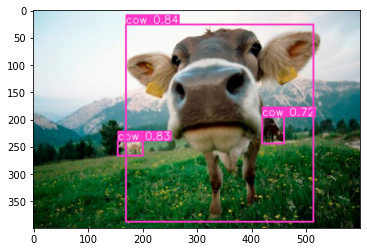

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

In [6]:
import uuid   # Unique identifier
import os
import time

In [7]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['focused', 'distracted']
number_imgs = 50

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        # assigning image path with unique names - using uuid
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
IMAGES_PATH

Labelling manually in YOLO format - !git clone https://github.com/tzutalin/labelImg


In [ ]:
'''
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2
'''

In [8]:
from yolov5 import train #cloned earlier

In [ ]:
train.run(data='dataset.yaml', imgsz=320, weights='yolov5s.pt', batch=4, epoch=10, num_workers=1) 

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()